# Telco Customer Churn Analysis

This notebook conducts exploratory data analysis (EDA) to understand churn behavior, segmentation, 
and customer churn profiling. The goal is to support business questions such as:

1. Which customer segments have the highest churn rate?
2. What are the key factors influencing customer churn?
3. How does churn affect total revenue?
4. What strategies could help reduce churn and retain valuable customers?

## Import Libraries

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Cleaned Data

In [73]:
df = pd.read_csv("D:\\DATA SCIENCE\\CHURN PROJ\\TELCO_CLEANED.csv")

## Churn Profiling

Separate categorical and numerical features for further analysis.

In [74]:
target = "Churn"

# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variable from feature lists
categorical_features = [col for col in categorical_features if col != target]
numeric_features = [col for col in numeric_features if col != target]

## Churn Distribution

Examine the overall churn percentage and visualize the distribution.

Churn Rate (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


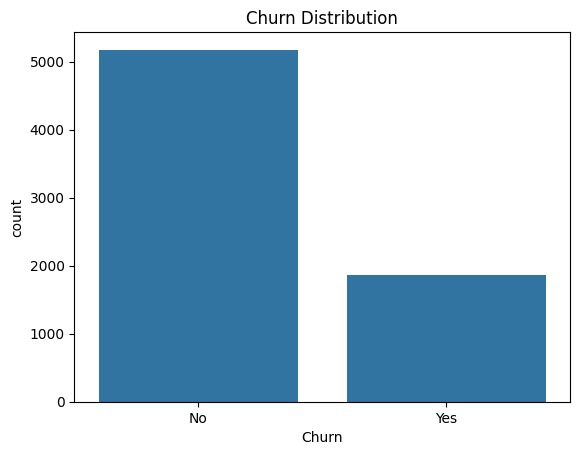

In [75]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Rate (%):")
print(churn_rate)

sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.show()

## Categorical Feature Relationship with Churn

Analyze how categorical features such as contract type, payment method, and internet service relate to churn behavior.


📊 Crosstab: Churn vs Contract
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


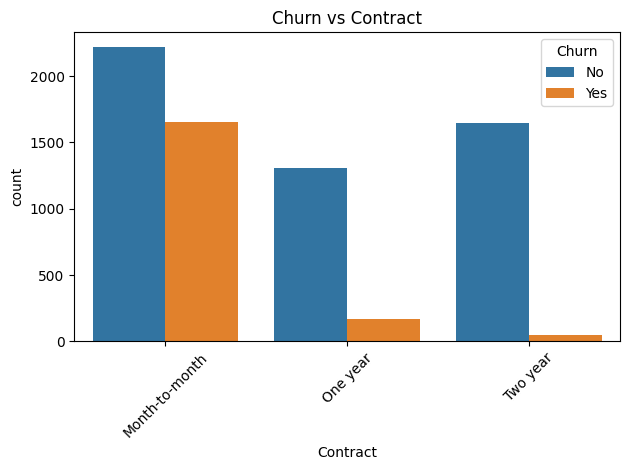


📊 Crosstab: Churn vs PaymentMethod
Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


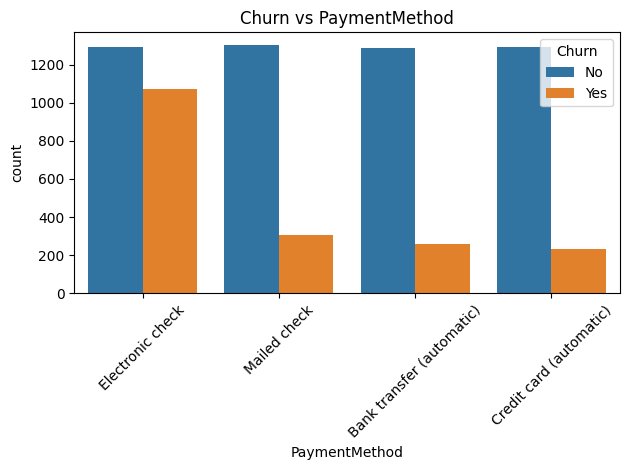


📊 Crosstab: Churn vs InternetService
Churn                   No        Yes
InternetService                      
DSL              81.040892  18.959108
Fiber optic      58.107235  41.892765
No               92.595020   7.404980


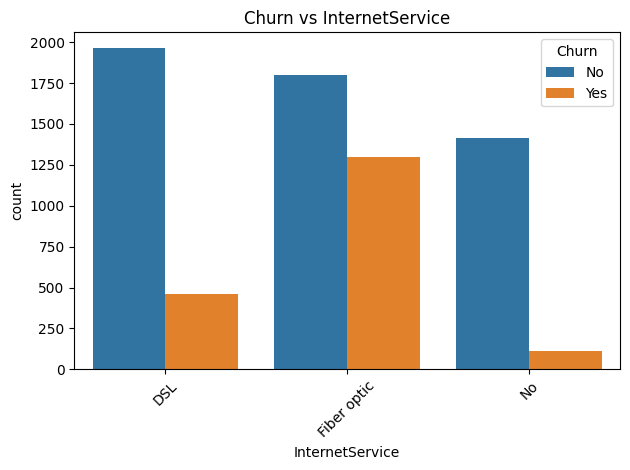


📊 Crosstab: Churn vs TechSupport
Churn                       No        Yes
TechSupport                              
No                   58.364526  41.635474
No internet service  92.595020   7.404980
Yes                  84.833659  15.166341


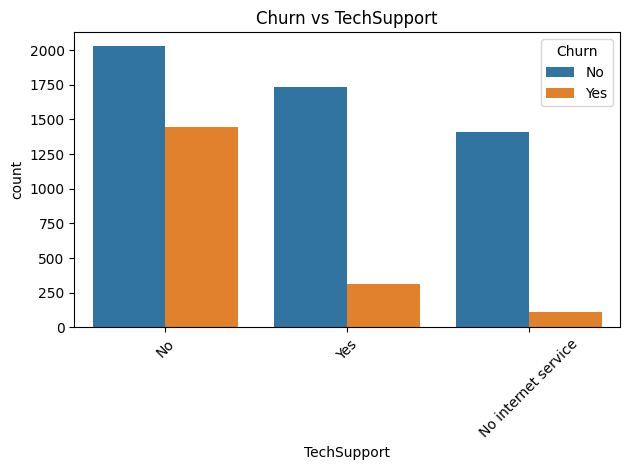


📊 Crosstab: Churn vs OnlineSecurity
Churn                       No        Yes
OnlineSecurity                           
No                   58.233276  41.766724
No internet service  92.595020   7.404980
Yes                  85.388806  14.611194


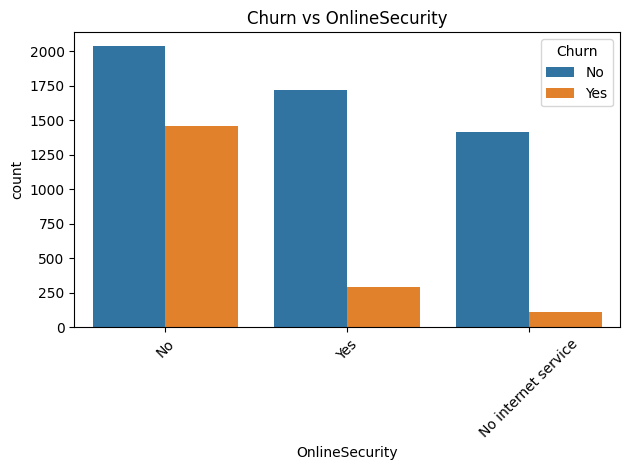


📊 Crosstab: Churn vs Partner
Churn           No        Yes
Partner                      
No       67.042021  32.957979
Yes      80.335097  19.664903


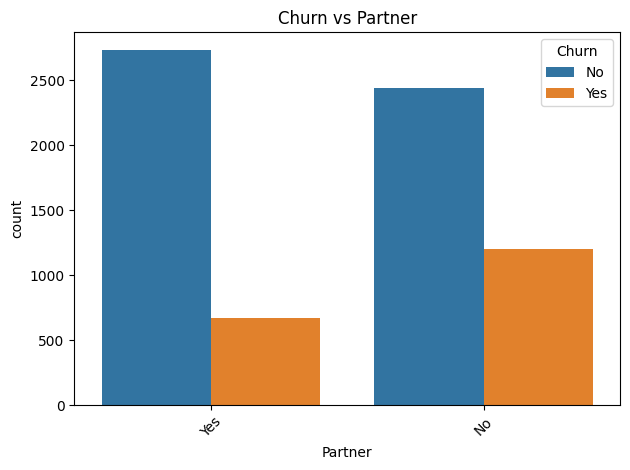


📊 Crosstab: Churn vs Dependents
Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.549763  15.450237


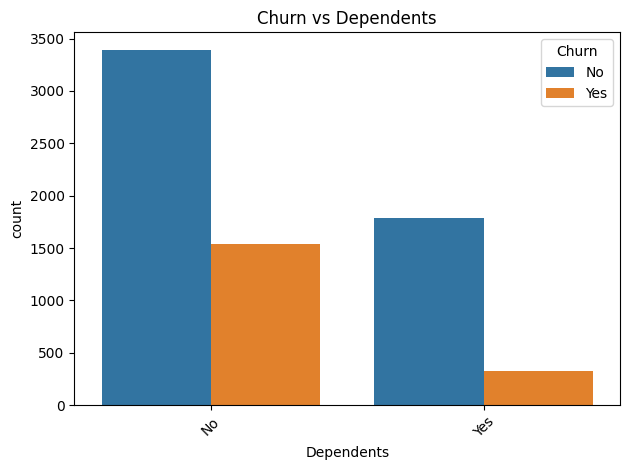

In [76]:
categorical_features = [
    'Contract', 'PaymentMethod', 'InternetService', 
    'TechSupport', 'OnlineSecurity', 'Partner', 'Dependents'
]

for col in categorical_features:
    print(f"\n📊 Crosstab: Churn vs {col}")
    print(pd.crosstab(df[col], df['Churn'], normalize='index') * 100)
    
    # Visualization
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Churn vs {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Numerical Feature Relationship with Churn

Compare numeric characteristics (e.g., monthly charges, tenure, total charges) between churned and non-churned customers.

In [81]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

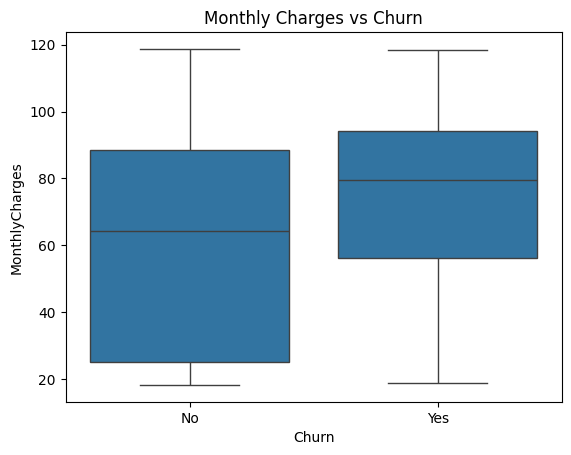

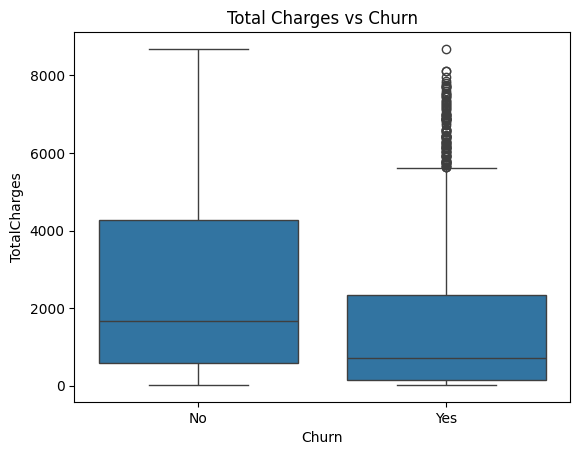

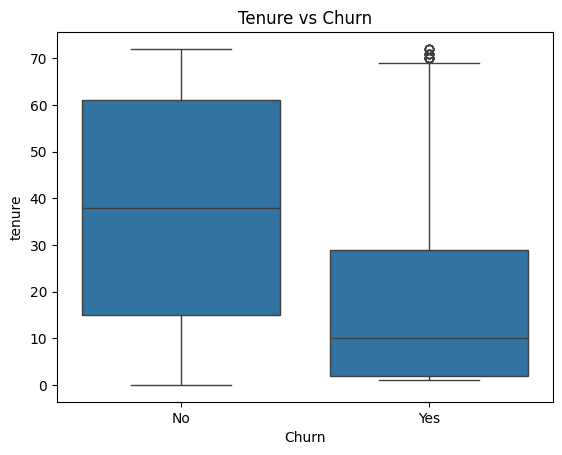

In [82]:
df.groupby("Churn")[["MonthlyCharges", "tenure", "TotalCharges"]].mean()

# Monthly Charges
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs Churn")
plt.show()

# Total Charges
sns.boxplot(data=df, x="Churn", y="TotalCharges")
plt.title("Total Charges vs Churn")
plt.show()

# Tenure
sns.boxplot(data=df, x="Churn", y="tenure")
plt.title("Tenure vs Churn")
plt.show()

## Churn Impact on Revenue

Estimate total revenue loss from churned customers.

In [83]:
# Total monthly revenue lost
lost_revenue = df.loc[df['Churn'] == "Yes", "MonthlyCharges"].sum()
print("Total Monthly Revenue Lost: ", round(lost_revenue, 2))

# Compare total charges between churned and non-churned customers
print(df.groupby("Churn")["TotalCharges"].sum())

Total Monthly Revenue Lost:  139130.85
Churn
No     1.320861e+07
Yes    2.862927e+06
Name: TotalCharges, dtype: float64


## High-Risk Segment Identification

Identify customer segments with the highest churn potential 
(e.g., monthly contract and high monthly charges).

In [84]:
high_risk = df[(df["Contract"] == "Month-to-month") & 
               (df["MonthlyCharges"] > 80)]

print("Number of High-Risk Customers:", high_risk.shape[0])
print("Churn Rate in This Segment (%):")
print(high_risk["Churn"].value_counts(normalize=True) * 100)

Number of High-Risk Customers: 1465
Churn Rate in This Segment (%):
Churn
Yes    52.150171
No     47.849829
Name: proportion, dtype: float64


## Customer Lifetime Value (CLV) and Priority

Calculate estimated Customer Lifetime Value (CLV) and identify the top customers 
to prioritize for retention strategies.

In [86]:
data = pd.read_csv("D:\DATAS\TELCO\TELCO.csv")

# Estimate CLV: MonthlyCharges × Tenure
data["CLV"] = data["MonthlyCharges"] * data["tenure"]

# Top customers by CLV
top_customers = data.sort_values("CLV", ascending=False).head(10)
top_customers[["customerID", "MonthlyCharges", "tenure", "CLV", "Churn"]]

,customerID,MonthlyCharges,tenure,CLV,Churn
4586,7569-NMZYQ,118.75,72,8550.00,No
6118,9924-JPRMC,118.20,72,8510.40,No
4610,2889-FPWRM,117.80,72,8481.60,Yes
3205,3810-DVDQQ,117.60,72,8467.20,No
6768,9739-JLPQJ,117.50,72,8460.00,No
4155,6904-JLBGY,117.35,72,8449.20,No
2368,6650-BWFRT,117.15,72,8434.80,No
2115,8984-HPEMB,118.65,71,8424.15,No
5347,9788-HNGUT,116.95,72,8420.40,No
2025,1488-PBLJN,116.85,72,8413.20,No
